Notebook purpose

- Sense-check and explore calculated salaries

In [46]:
import os
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('/Users/fgu/dev/projects/entropy')
import entropy.helpers.aws as aws
import entropy.data.cleaners as cl
import entropy.data.creators as cr

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
SAMPLE = 'X77'
fp = f'~/tmp/entropy_{SAMPLE}.parquet'
df = aws.read_parquet(fp)

In [36]:
incomes = df.groupby(['user_id', df.date.dt.year]).income.first()
incomes.describe()

count      1499.000000
mean      27591.567308
std       16260.348333
min           0.540000
25%       17470.395463
50%       23792.458984
75%       33491.493652
max      148410.785156
Name: income, dtype: float64

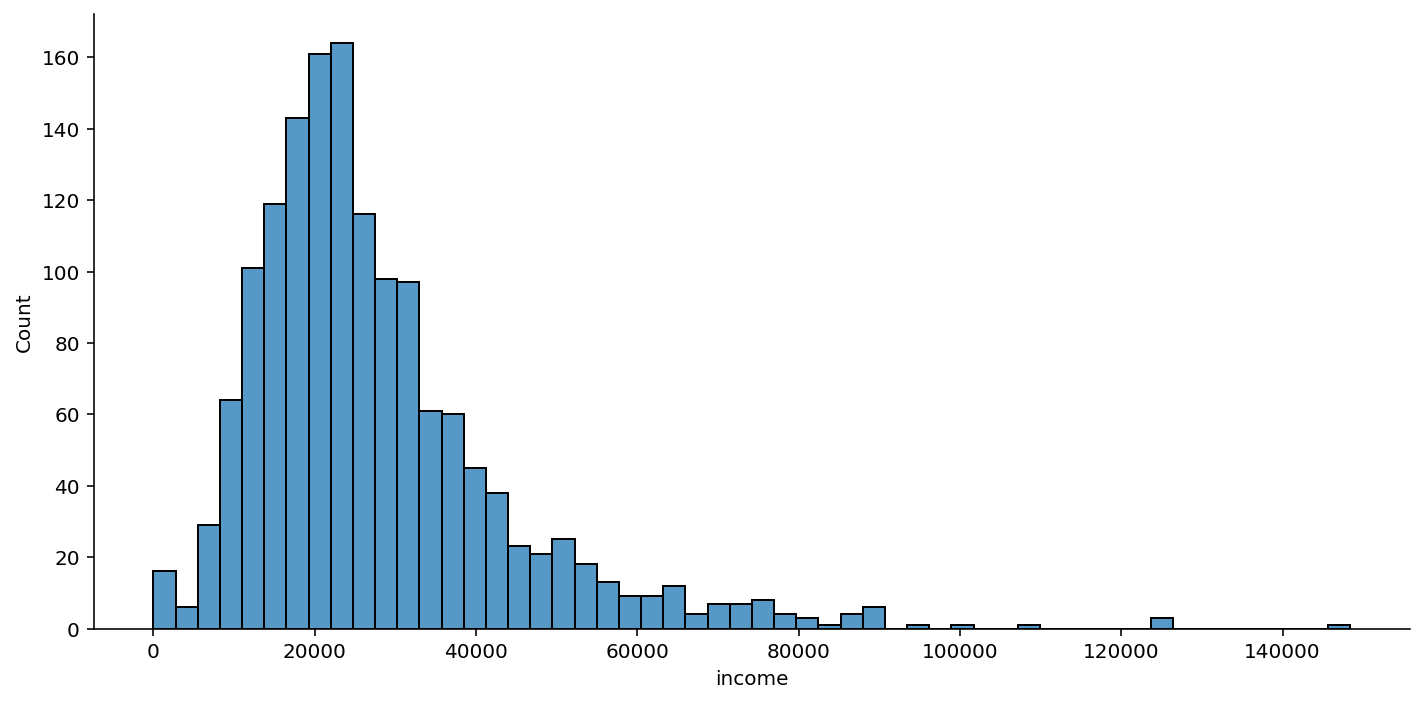

In [54]:
sns.displot(incomes, aspect=2)
plt.savefig('/Users/fgu/test.pdf')